In [2]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [3]:
data = pd.read_csv('Amazon_data_file.csv')

In [4]:
data

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,Amount,ship-city,ship-state,ship-postal-code
0,171-9198151-1101146,30-04-2022,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,B09K3WFS32,Shipped,1,406,BENGALURU,KARNATAKA,560085
1,404-0687676-7273146,30-04-2022,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,B07WV4JV4D,Shipped,1,329,NAVI MUMBAI,MAHARASHTRA,410210
2,407-1069790-7240320,30-04-2022,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,B098714BZP,Shipped,1,574,CHENNAI,TAMIL NADU,600073
3,404-1490984-4578765,30-04-2022,Shipped,Amazon,Amazon.in,Expedited,SET264,SET264-KR-NP-XL,Set,XL,B08YN7XDSG,Shipped,1,824,GHAZIABAD,UTTAR PRADESH,201102
4,408-5748499-6859555,30-04-2022,Shipped,Amazon,Amazon.in,Expedited,J0095,J0095-SET-L,Set,L,B08CMHNWBN,Shipped,1,653,CHANDIGARH,CHANDIGARH,160036
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106083,403-6094171-8832305,06-02-2022,Shipped - Delivered to Buyer,Merchant,Amazon.in,Expedited,SET291,SET291-KR-PP-L,Set,L,B099NJKJ54,Shipped,1,517,NAVI MUMBAI,MAHARASHTRA,410210
106084,407-9812499-5444306,06-02-2022,Shipped,Amazon,Amazon.in,Expedited,J0244,J0244-SKD-L,Set,L,B0925WM8Z6,Shipped,1,999,TURA,MEGHALAYA,794001
106085,407-6586256-5693922,06-02-2022,Shipped,Amazon,Amazon.in,Expedited,MEN5004,MEN5004-KR-XXL,kurta,XXL,B08YZ16M9S,Shipped,1,690,Gurgaon,HARYANA,122002
106086,407-9472434-7231543,06-02-2022,Shipped,Amazon,Amazon.in,Expedited,SET405,SET405-KR-NP-XS,Set,XS,B09QJ399Q3,Shipped,1,1199,MUMBAI,MAHARASHTRA,400056


In [6]:
data.dtypes

Order ID              object
Date                  object
Status                object
Fulfilment            object
Sales Channel         object
ship-service-level    object
Style                 object
SKU                   object
Category              object
Size                  object
ASIN                  object
Courier Status        object
Qty                    int64
Amount                 int64
ship-city             object
ship-state            object
ship-postal-code       int64
dtype: object

In [7]:
timefmt = "%d-%m-%Y"
data['Date'] = pd.to_datetime(data['Date'], format= timefmt, errors ='coerce')

In [8]:
data.dtypes

Order ID                      object
Date                  datetime64[ns]
Status                        object
Fulfilment                    object
Sales Channel                 object
ship-service-level            object
Style                         object
SKU                           object
Category                      object
Size                          object
ASIN                          object
Courier Status                object
Qty                            int64
Amount                         int64
ship-city                     object
ship-state                    object
ship-postal-code               int64
dtype: object

In [9]:
data.columns

Index(['Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier Status', 'Qty', 'Amount', 'ship-city', 'ship-state',
       'ship-postal-code'],
      dtype='object')

In [10]:
data.isnull().sum()

Order ID              0
Date                  0
Status                0
Fulfilment            0
Sales Channel         0
ship-service-level    0
Style                 0
SKU                   0
Category              0
Size                  0
ASIN                  0
Courier Status        0
Qty                   0
Amount                0
ship-city             0
ship-state            0
ship-postal-code      0
dtype: int64

In [11]:
data[data.duplicated()]

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,Amount,ship-city,ship-state,ship-postal-code


# Which is highly preferred 'Fulfilment' process?

In [12]:
data['Fulfilment'].value_counts()

Fulfilment
Amazon      76636
Merchant    29452
Name: count, dtype: int64

<Axes: xlabel='Fulfilment'>

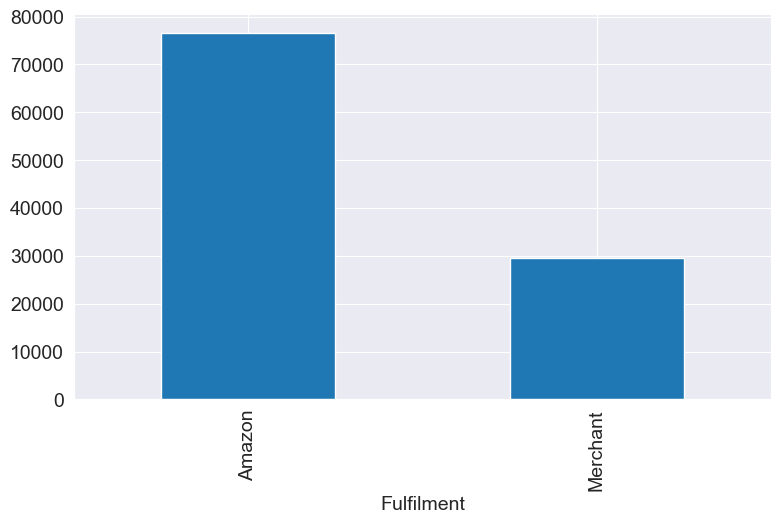

In [13]:
data['Fulfilment'].value_counts().plot(kind='bar')

# Which is the Category ordered in highest Quantity?

In [14]:
data.groupby('Category').Qty.sum().sort_values(ascending=False)

Category
Set              41579
kurta            40558
Western Dress    12936
Top               9149
Ethnic Dress       958
Blouse             818
Bottom             360
Saree              128
Dupatta              1
Name: Qty, dtype: int64

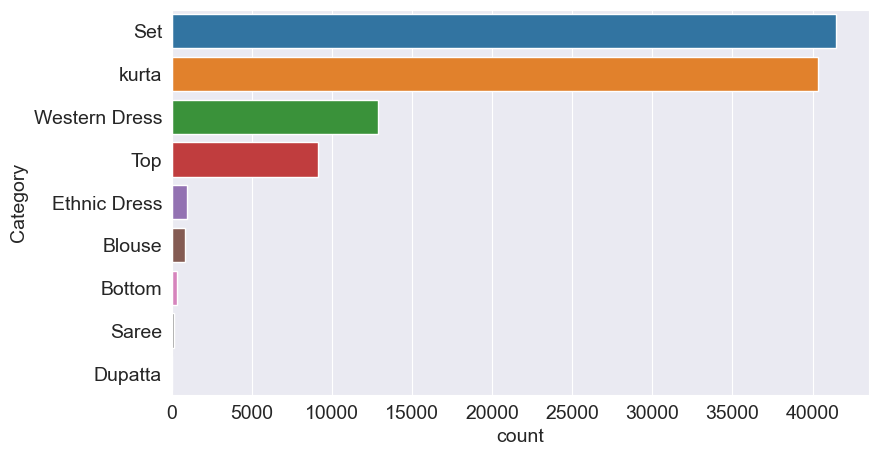

In [15]:
sns.barplot(x=data['Category'].value_counts(), y=data['Category'].value_counts().index, data=data, orient='h')
plt.show()

# Which Month has the highest no of orders?

In [16]:
data['Month'] = data.Date.dt.month

In [17]:
data.Month.value_counts()

Month
4     29262
5     23659
6     20712
3      4365
8      3981
7      3791
9      3769
10     3578
12     3481
11     3459
2      3283
1      2748
Name: count, dtype: int64

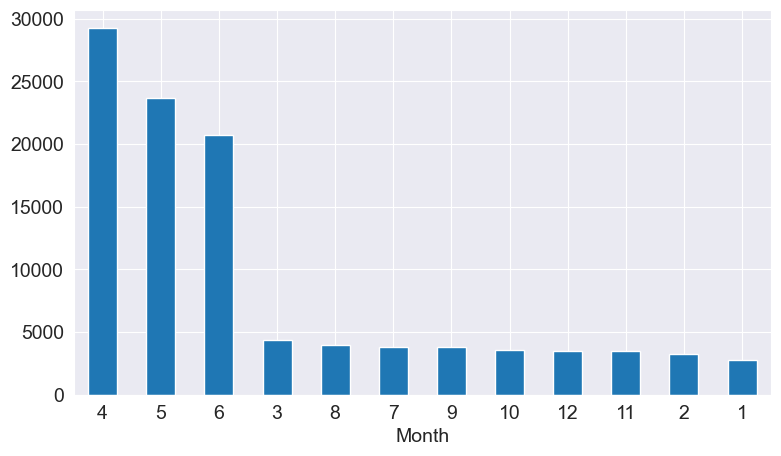

In [33]:
data['Month'].value_counts().plot(kind='bar')
plt.xticks(rotation=0);

# Count different size of clothings purchased in each category

In [19]:
data.groupby('Category').Size.value_counts().sort_values(ascending=False)

Category       Size
Set            M       7755
kurta          L       7205
               XL      7067
               M       6971
Set            L       6788
               XL      6305
kurta          XXL     6225
Set            S       6190
               XXL     5101
               3XL     4746
kurta          S       4640
               3XL     4546
Set            XS      4430
kurta          XS      2443
Western Dress  L       2366
               M       2166
               XL      1954
               S       1825
               XXL     1801
               3XL     1605
Top            XL      1590
               XXL     1570
               M       1564
               L       1513
Western Dress  XS      1185
Top            S       1061
               3XL     1013
               XS       808
kurta          6XL      545
               5XL      413
               4XL      306
Blouse         Free     181
Ethnic Dress   XL       162
               L        150
               M        150


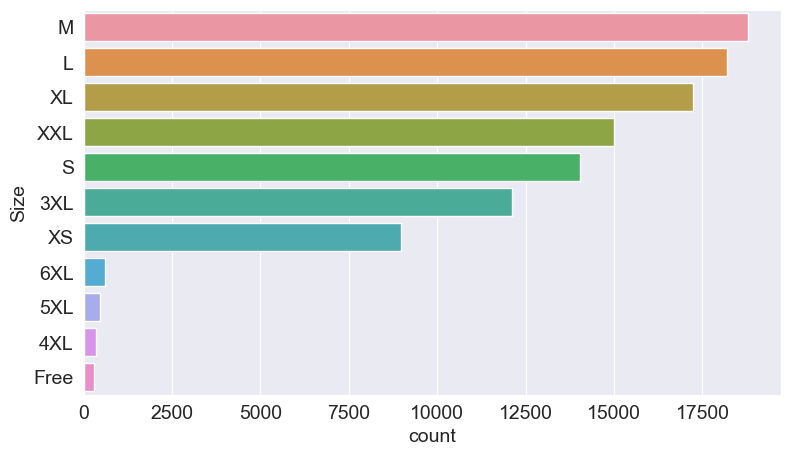

In [21]:
sns.barplot(x=data['Size'].value_counts(), y=data['Size'].value_counts().index, data=data, orient='h')
plt.show()

In [20]:
data

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,Amount,ship-city,ship-state,ship-postal-code,Month
0,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,B09K3WFS32,Shipped,1,406,BENGALURU,KARNATAKA,560085,4
1,404-0687676-7273146,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,B07WV4JV4D,Shipped,1,329,NAVI MUMBAI,MAHARASHTRA,410210,4
2,407-1069790-7240320,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,B098714BZP,Shipped,1,574,CHENNAI,TAMIL NADU,600073,4
3,404-1490984-4578765,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,SET264,SET264-KR-NP-XL,Set,XL,B08YN7XDSG,Shipped,1,824,GHAZIABAD,UTTAR PRADESH,201102,4
4,408-5748499-6859555,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,J0095,J0095-SET-L,Set,L,B08CMHNWBN,Shipped,1,653,CHANDIGARH,CHANDIGARH,160036,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106083,403-6094171-8832305,2022-02-06,Shipped - Delivered to Buyer,Merchant,Amazon.in,Expedited,SET291,SET291-KR-PP-L,Set,L,B099NJKJ54,Shipped,1,517,NAVI MUMBAI,MAHARASHTRA,410210,2
106084,407-9812499-5444306,2022-02-06,Shipped,Amazon,Amazon.in,Expedited,J0244,J0244-SKD-L,Set,L,B0925WM8Z6,Shipped,1,999,TURA,MEGHALAYA,794001,2
106085,407-6586256-5693922,2022-02-06,Shipped,Amazon,Amazon.in,Expedited,MEN5004,MEN5004-KR-XXL,kurta,XXL,B08YZ16M9S,Shipped,1,690,Gurgaon,HARYANA,122002,2
106086,407-9472434-7231543,2022-02-06,Shipped,Amazon,Amazon.in,Expedited,SET405,SET405-KR-NP-XS,Set,XS,B09QJ399Q3,Shipped,1,1199,MUMBAI,MAHARASHTRA,400056,2


In [22]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# Find the distribution of courier status

In [23]:
CourierStatus_counts = data['Courier Status'].value_counts() #counts(dropna=False) for nan
CourierStatus_counts

Courier Status
Shipped      100043
Unshipped      6045
Name: count, dtype: int64

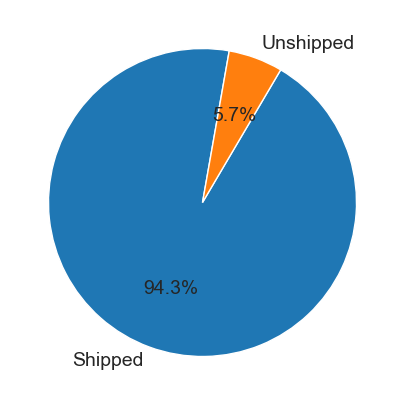

In [24]:
plt.pie(CourierStatus_counts, labels=CourierStatus_counts.index, autopct='%1.1f%%', startangle=80);

# Which are top 10 States with highest number of sales?

In [28]:
data['ship-state'].value_counts().head(10)

ship-state
MAHARASHTRA       18537
KARNATAKA         14501
TAMIL NADU         9422
TELANGANA          9308
UTTAR PRADESH      8667
DELHI              5601
KERALA             5304
WEST BENGAL        4872
ANDHRA PRADESH     4358
GUJARAT            3738
Name: count, dtype: int64

# Find the distribution for Ship Service Level

In [31]:
data['ship-service-level'].value_counts()

ship-service-level
Expedited    75725
Standard     30363
Name: count, dtype: int64

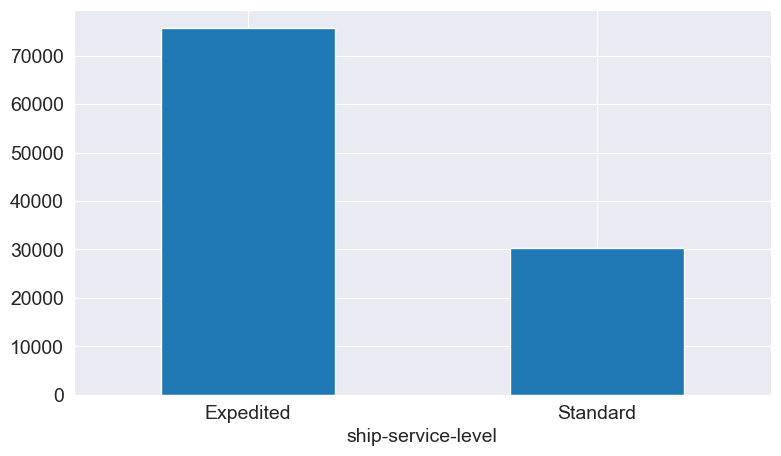

In [32]:
data['ship-service-level'].value_counts().plot(kind='bar')
plt.xticks(rotation=0);

# Which product generated the highest revenue?

In [34]:
data.groupby('Category').Amount.sum().sort_values(ascending=False)

Category
Set              27562162
kurta            26611680
Western Dress     8681882
Top               6031229
Ethnic Dress       637723
Blouse             523043
Bottom             241380
Saree               85955
Dupatta               702
Name: Amount, dtype: int64

# Which State generated the highest revenue?

In [37]:
data.groupby('ship-state').Amount.sum().sort_values(ascending=False).head(10)

ship-state
MAHARASHTRA       12305257
KARNATAKA          9610607
TAMIL NADU         6275935
TELANGANA          6198490
UTTAR PRADESH      5739219
DELHI              3697624
KERALA             3532677
WEST BENGAL        3255160
ANDHRA PRADESH     2870528
GUJARAT            2477877
Name: Amount, dtype: int64

# Which City product generated the highest revenue?

In [38]:
data.groupby[('ship-city','ship-state')].Amount.sum().sort_values(ascending=False)

ship-city
BENGALURU                     6290098
HYDERABAD                     4440081
MUMBAI                        3447244
NEW DELHI                     3182374
CHENNAI                       2943999
                               ...   
Krishnaraja nagara, Mysore        259
Mayurbhanj                        259
Noida sector 76                   259
NAGOD                             249
Shirdi                            229
Name: Amount, Length: 8125, dtype: int64